<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Final/CNNAE_5x20_8_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy
import time
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense,  Reshape, GaussianNoise, BatchNormalization, Conv1D, Activation, Lambda, Flatten

from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical





input_block_length = 5
num_of_input_block = 20
input_message_length = input_block_length * num_of_input_block 
encoder_output_length = 8
channel_size = 10 


NUM_OF_INPUT_MESSAGE = 1000*10
SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10

bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]

bler_per_iter_ldpc_50_100_itpp_psk_4 = [1., 1., 0.997, 0.989, 0.92,  0.697, 0.391, 0.123, 0.042, 0.011, 0.,    0.,  0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]
bler_per_iter_uncoded_100_itpp_psk_4 = [1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.997, 0.991, 0.97,  0.948, 0.924, 0.821, 0.74,  0.566, 0.444, 0.296, 0.211, 0.136]
bler_per_iter_uncoded_50_itpp_psk_4 = [1.,    1.,    1.,    1.,    .998,    .986,    .987,    0.974, 0.936, 0.912,  0.859, 0.785, 0.7, 0.602,  0.488, 0.329, 0.255, 0.168, 0.125, 0.061]
bler_per_iter_uncoded_50_itpp_psk_2 = [0.982, 0.964, 0.94,  0.9,   0.861, 0.773, 0.682, 0.565, 0.478, 0.359, 0.248, 0.169, 0.105, 0.074, 0.037, 0.016, 0.011, 0.003, 0.001, 0.   ]
bler_per_iter_uncoded_100_itpp_psk_2 = [0.999, 0.999, 0.995, 0.992, 0.975, 0.939, 0.898, 0.841, 0.72,  0.57,  0.44,  0.312, 0.209, 0.131, 0.071, 0.036, 0.017, 0.013, 0.003, 0.002]

ber_per_iter_ldpc_50_100_itpp_psk_4 = [0.21282, 0.20112, 0.18674, 0.16894, 0.15726, 0.14026, 0.1274, 0.11118, 0.0886,
 0.06074, 0.03002, 0.01486, 0.00372, 0.0003 , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     ] 
ber_per_iter_uncoded_50_itpp_psk_2 = [1.2920e-01, 1.1560e-01, 1.0574e-01, 9.3500e-02, 8.1340e-02, 6.6180e-02,
 5.7260e-02, 4.7700e-02, 3.8560e-02, 2.9580e-02, 2.3500e-02, 1.6280e-02,
 1.2500e-02, 8.5000e-03, 6.5200e-03, 3.8000e-03, 2.3800e-03, 1.2600e-03,
 9.0000e-04, 4.2000e-04, 8.0000e-05, 8.0000e-05, 4.0000e-05, 4.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
ber_per_iter_uncoded_100_itpp_psk_2 = [1.3108e-01, 1.1509e-01, 1.0292e-01, 9.0680e-02, 7.8550e-02, 6.6490e-02,
 5.5550e-02, 4.6650e-02, 3.7450e-02, 2.9480e-02, 2.2790e-02, 1.8000e-02,
 1.2360e-02, 8.4600e-03, 6.1900e-03, 4.0100e-03, 2.6000e-03, 1.5000e-03,
 7.7000e-04, 4.9000e-04, 2.6000e-04, 5.0000e-05, 5.0000e-05, 2.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]


bler_per_iter_ldpc_100_200_itpp_psk_4 = [1.   , 1., 1., 1., 1., 1., 1., 1., 0.984, 0.8, 0.338, 0.077,
 0.006, 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0. ]
ber_per_iter_ldpc_100_200_itpp_psk_4 = [0.21407, 0.19966, 0.18519, 0.17217, 0.15746, 0.14123, 0.12889, 0.11378, 0.092,
 0.06216, 0.02413, 0.00589, 0.00051, 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     ]


import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = (10 ** (- snr / 20))  #*(numpy.sqrt(2))
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [3]:
def conv_to_binary_from_decimal (decimal,input_message_size, input_message_length):
  binary = numpy.random.randint(1, size=(input_message_size,input_message_length))
  for i in range (input_message_size):
    bin = [int(x) for x in list('{0:0b}'.format(decimal[0][i]))]
    #print(bin)
    for j in range (len(bin)):
      offset = input_message_length - len(bin)
      #print ("x",offset)
      binary [i][j+offset] = bin [j]
  return binary

def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
  binary = numpy.random.randint(1, size=(num_of_input,num_of_block, block_size))
  for i in range (num_of_input):
      for j in range (num_of_block):
        #print ("xxx", input[i][j])
        bin = [int(x) for x in list('{0:0b}'.format(input[i][j][0]))]
        #print(bin)
        for k in range (len(bin)):
          offset = block_size - len(bin)
          #print ("x",offset)
          binary [i][j][k+offset] = bin [k]
  return binary

def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message_decimal = []
    decoded_message_decimal.append(numpy.argmax(decoded_message, axis=1))
    decoded_message_binary = conv_to_binary_from_decimal (decoded_message_decimal, num_of_input_msg,  input_message_length)
    ber,bler = GetBerBler (input_binary, decoded_message_binary)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def get_block_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_decimal, num_of_input,num_of_input_block, input_block_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:

    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)

    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)

    for i in range (num_of_input):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])

    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))

    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, num_of_input, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (input_decimal, num_of_input, num_of_input_block, input_block_length)   
    diff = abs(decoded_message_binary - input_message_binary)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    block_error = numpy.count_nonzero(diff_sum!=0)
    bit_error = numpy.sum(diff_sum)
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    bler = float(total_msg_error)/(num_of_input)
    ber = float(total_bit_error)/(num_of_input*num_of_input_block*input_block_length)
    print('SNR: {:04.3f}:-> BLER: {:03.5f} BER: {:03.5f} '.format(snr,bler,ber))
    print ("total_bit_error:", total_bit_error)
    print ("total_msg_error:", total_msg_error)
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

In [4]:
def PowerNormLayer(x):
    nx =  x / tf.sqrt(tf.reduce_mean(tf.square(x)))
    return nx

In [5]:
snr_std = Snr2Sigma(7.0)
num_filters = 2**encoder_output_length
print ("num_of_input_block", num_of_input_block)
print ("input_block_length", input_block_length)

input_message_x = Input(shape=(num_of_input_block, 2**input_block_length), name="inputs")

enc = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='enc_1')(input_message_x)
enc = BatchNormalization(name='enc_2')(enc)
enc = Activation('elu', name='enc_3')(enc)

enc = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='enc_4')(enc)
enc = BatchNormalization(name='enc_5')(enc)
enc = Activation('elu', name='ecn_6')(enc)

enc = Conv1D(filters=2 * channel_size, strides=1, kernel_size=1, name='ch_1')(enc)
enc = BatchNormalization(name='ch_2')(enc)
enc = Activation('linear', name='ch_3')(enc)
enc = Flatten()(enc)
encoder_out = Lambda(PowerNormLayer, name='PowerNorm')(enc)

encoder = Model(input_message_x, encoder_out)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

encoded_input = Input(shape=(num_of_input_block*2*channel_size,))

reshaped_input = tf.reshape (encoded_input, (-1,num_of_input_block,2*channel_size))


dec = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='dec_1')(reshaped_input)
dec = BatchNormalization(name='dec_2')(dec)
dec = Activation('elu', name='dec_3')(dec)

dec = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='dec_4')(dec)
dec = BatchNormalization(name='dec_5')(dec)
dec = Activation('elu', name='dec_6')(dec)

model_output = Conv1D(filters=2 ** input_block_length, strides=1, kernel_size=1, name='d_10', activation='softmax')(dec)


decoder = Model(encoded_input, model_output)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

num_of_input_block 20
input_block_length 5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 20, 32)]          0         
_________________________________________________________________
enc_1 (Conv1D)               (None, 20, 256)           8448      
_________________________________________________________________
enc_2 (BatchNormalization)   (None, 20, 256)           1024      
_________________________________________________________________
enc_3 (Activation)           (None, 20, 256)           0         
_________________________________________________________________
enc_4 (Conv1D)               (None, 20, 256)           65792     
_________________________________________________________________
enc_5 (BatchNormalization)   (None, 20, 256)           1024      
_________________________________________________________________
ecn_6 (Activation)

In [6]:
training_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(training_input_message)
training_input_message_one_hot = to_categorical(y=training_input_message, num_classes=2**input_block_length)
#print(training_input_message_one_hot)

test_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(test_input_message)
test_input_message_one_hot = to_categorical(y=test_input_message, num_classes=2**input_block_length)
#print(test_input_message_one_hot)


In [7]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
training_history1 = dict ()
for snr in (numpy.arange (0, 1, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  history = autoencoder.fit(training_input_message_one_hot, training_input_message,
                epochs=50,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message))
  training_history1 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
20/20 [==============================] - 12s 536ms/step - loss: 1.6623 - sparse_categorical_accuracy: 0.6407 - val_loss: 0.2309 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 10s 512ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9825 - val_loss: 0.0534 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 10s 516ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0287 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 10s 514ms/step - loss: 0.0705 - sparse_categorical_accuracy: 0.9864 - val_loss: 0.0179 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 10s 505ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.0107 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 10s 501ms

In [8]:
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
ber_batch_size = 1000
ber_iteration = int(NUM_OF_INPUT_MESSAGE/ber_batch_size)
for snr in numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (ber_iteration):
    input_message_xx = training_input_message_one_hot [i:i+ber_batch_size]
    #print ("input", training_input_message[i:i+ber_batch_size])
    encoded_message = encoder.predict(training_input_message_one_hot[i:i+ber_batch_size])
    #print (encoded_message)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    #print (noised_message)
    #awgn_channel = GaussianNoise(sigma,input_shape=(CHANEL_SIZE,))
    #noised_message = awgn_channel.predict(encoded_message)
    #noised_message = awgn_layer (encoded_message)    
    #print(noised_message)
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))
    #print ("decoded1:", decoded_message)
    #def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, ber_batch_size, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (training_input_message [i:i+ber_batch_size], ber_batch_size, num_of_input_block, input_block_length)   
    #print ("decoded_message_binary:", decoded_message_binary)
    #print ("input_message_binary:", input_message_binary)
    diff = abs(decoded_message_binary - input_message_binary)
    #print ("diff", diff)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    #print ("diff_sum", diff_sum)
    block_error = numpy.count_nonzero(diff_sum!=0)
    #print ("block_error:", block_error)
    bit_error = numpy.sum(diff_sum)
    #print ("bit_error",bit_error )
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    #print ("total_msg_error:", total_msg_error)
    #print ("total_bit_error", total_bit_error)
    i = i + ber_batch_size
  bler = float(total_msg_error)/(ber_iteration*ber_batch_size)

  ber = float(total_bit_error)/(ber_iteration*ber_batch_size*num_of_input_block*input_block_length)
  print('SNR: {:04.3f}:\n ->BLER: {:03.5f}  BER: {:03.5f}'.format(snr,bler,ber,total_time))
  print ("total:", total_bit_error)
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)  
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)  
  

SNR: 0.000:
 ->BLER: 0.29500  BER: 0.00895
total: 8946
SNR: 0.500:
 ->BLER: 0.17710  BER: 0.00518
total: 5180
SNR: 1.000:
 ->BLER: 0.09320  BER: 0.00254
total: 2543
SNR: 1.500:
 ->BLER: 0.04670  BER: 0.00126
total: 1263
SNR: 2.000:
 ->BLER: 0.01990  BER: 0.00052
total: 521
SNR: 2.500:
 ->BLER: 0.00840  BER: 0.00021
total: 206
SNR: 3.000:
 ->BLER: 0.00280  BER: 0.00007
total: 71
SNR: 3.500:
 ->BLER: 0.00130  BER: 0.00003
total: 34
SNR: 4.000:
 ->BLER: 0.00040  BER: 0.00001
total: 11
SNR: 4.500:
 ->BLER: 0.00020  BER: 0.00001
total: 5
SNR: 5.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 5.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 6.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 6.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 7.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 7.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 8.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 8.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 9.000:
 ->BLER: 0.00000  BER: 0.00000
to

In [9]:
print (training_input_message_one_hot.shape)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message, 
          training_input_message_one_hot.shape[0], training_input_message_one_hot.shape[1],
          int(numpy.math.log2(training_input_message_one_hot.shape[2])),
          channel_size*num_of_input_block)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

(10000, 20, 32)
SNR: 0.000:-> BLER: 0.30050 BER: 0.00919 
total_bit_error: 9185
total_msg_error: 3005
SNR: 0.500:-> BLER: 0.17640 BER: 0.00504 
total_bit_error: 5042
total_msg_error: 1764
SNR: 1.000:-> BLER: 0.08840 BER: 0.00241 
total_bit_error: 2410
total_msg_error: 884
SNR: 1.500:-> BLER: 0.04670 BER: 0.00125 
total_bit_error: 1251
total_msg_error: 467
SNR: 2.000:-> BLER: 0.02140 BER: 0.00059 
total_bit_error: 590
total_msg_error: 214
SNR: 2.500:-> BLER: 0.00720 BER: 0.00017 
total_bit_error: 175
total_msg_error: 72
SNR: 3.000:-> BLER: 0.00300 BER: 0.00008 
total_bit_error: 78
total_msg_error: 30
SNR: 3.500:-> BLER: 0.00070 BER: 0.00002 
total_bit_error: 23
total_msg_error: 7
SNR: 4.000:-> BLER: 0.00010 BER: 0.00000 
total_bit_error: 2
total_msg_error: 1
SNR: 4.500:-> BLER: 0.00010 BER: 0.00000 
total_bit_error: 3
total_msg_error: 1
SNR: 5.000:-> BLER: 0.00000 BER: 0.00000 
total_bit_error: 0
total_msg_error: 0
SNR: 5.500:-> BLER: 0.00000 BER: 0.00000 
total_bit_error: 0
total_msg_e

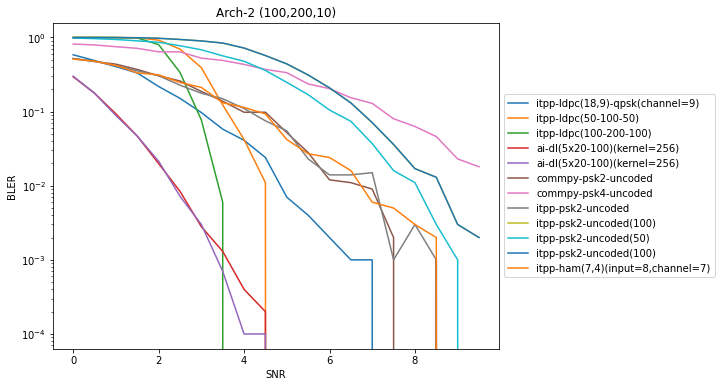

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
#ax2.plot(snrs,times_per_iter_pyldpc,'', label="pyldpc") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_tensor,'', label="tensor") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_awgn,'', label="commpy-awgn") # plot decode timing for different SNRs
ax1.set_xlabel('SNR')
#ax2.set_ylabel('Decoding Time [s]')
#ax2.annotate('Total Runtime: pyldpc:{:03.2f}s awgn:{:03.2f}s tensor:{:03.2f}s'.format(numpy.sum(times_per_iter_pyldpc), 
#            numpy.sum(times_per_iter_awgn), numpy.sum(times_per_iter_tensor)),
#            xy=(1, 0.35), xycoords='axes fraction',
#            xytext=(-20, 20), textcoords='offset pixels',
#            horizontalalignment='right',
#            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

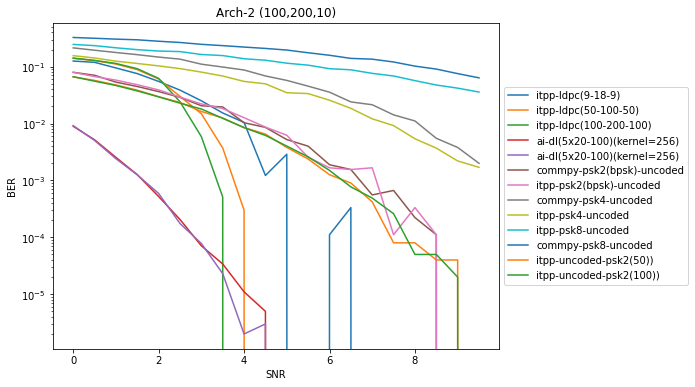

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

19.999857
20.286768
19.672495
0.6142731


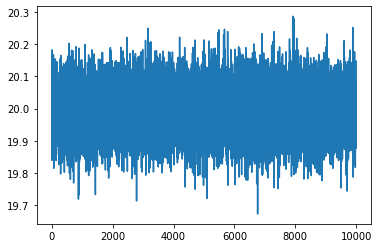

In [47]:
encoded_message = encoder.predict(training_input_message_one_hot)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))
print (numpy.max(x))
print (numpy.min(x))
print (numpy.max(x) - numpy.min(x))

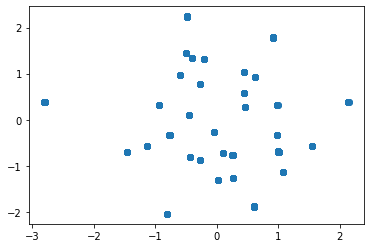

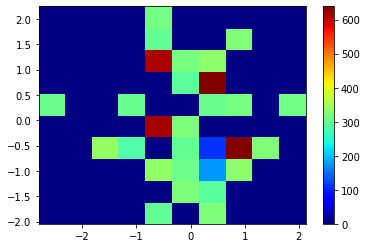

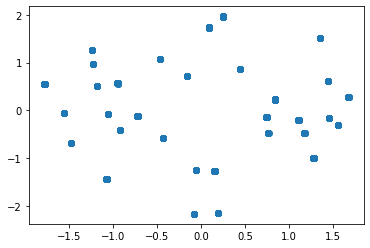

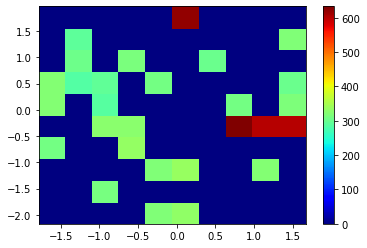

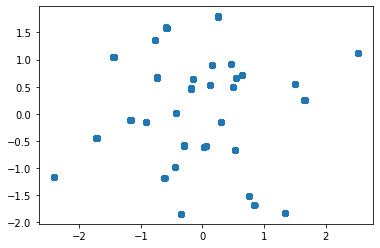

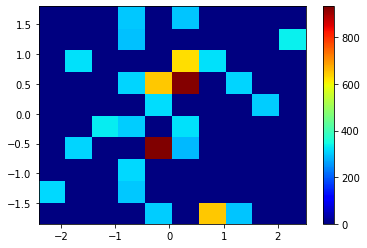

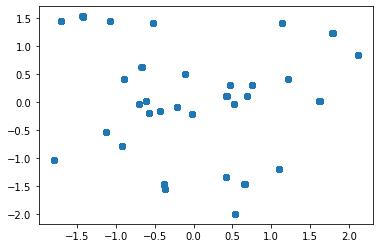

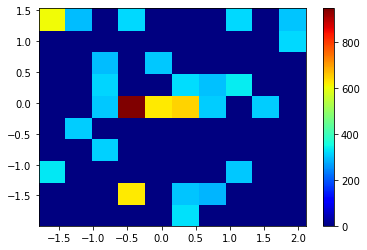

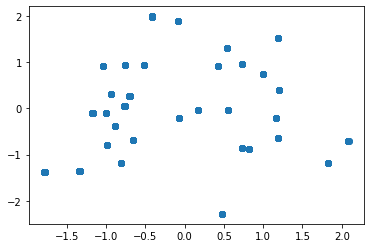

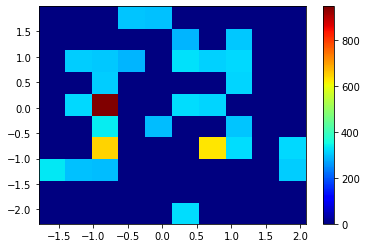

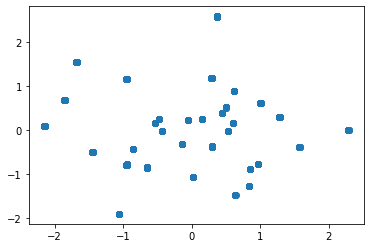

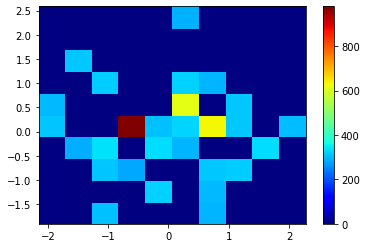

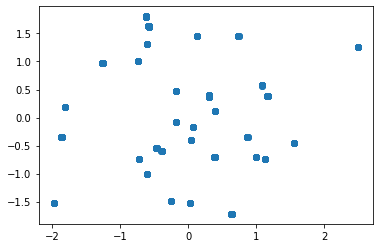

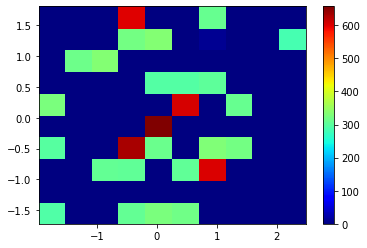

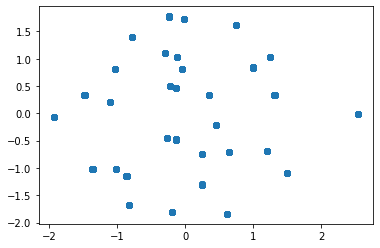

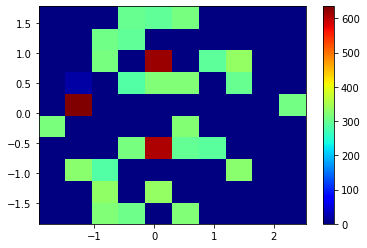

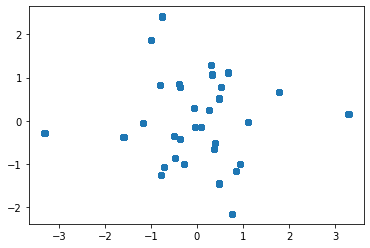

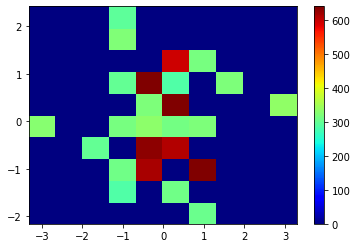

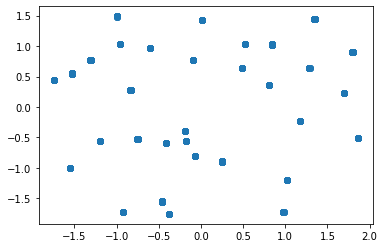

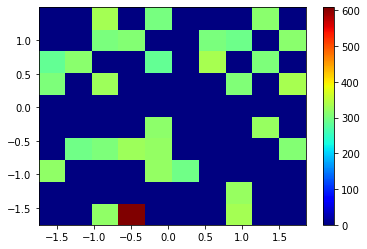

In [48]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

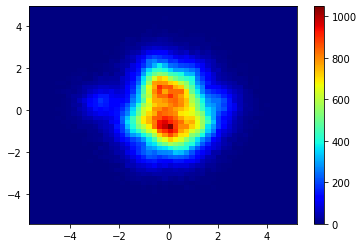

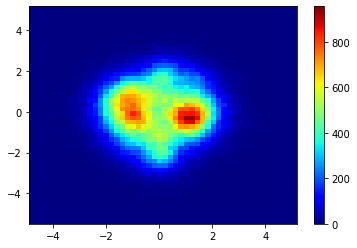

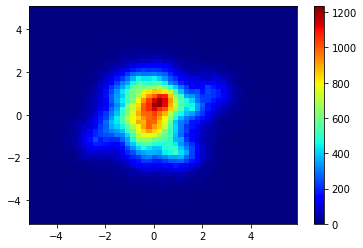

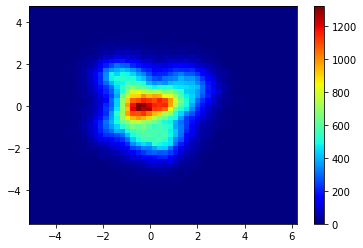

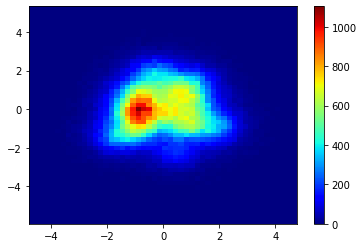

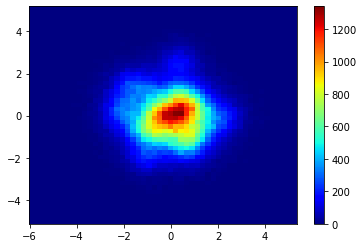

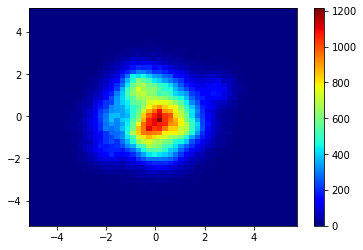

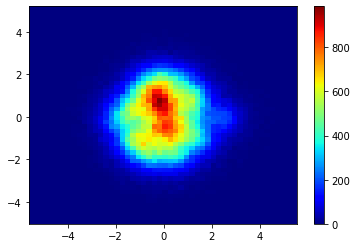

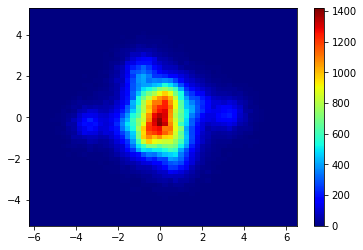

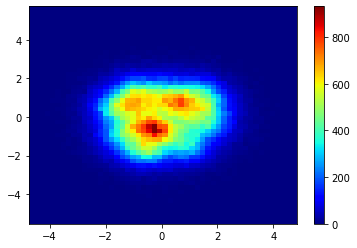

In [49]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

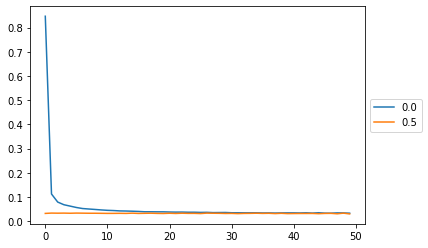

In [16]:
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [57]:
test_input_message = numpy.random.randint(2**input_block_length, size=(int(NUM_OF_INPUT_MESSAGE/10),num_of_input_block,1))
#print(test_input_message)
test_input_message_one_hot = to_categorical(y=test_input_message, num_classes=2**input_block_length)
#print(test_input_message_one_hot)

In [58]:
print (test_input_message_one_hot.shape)
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message, 
          test_input_message_one_hot.shape[0], test_input_message_one_hot.shape[1],
          int(numpy.math.log2(test_input_message_one_hot.shape[2])),
          channel_size*num_of_input_block)
print (ber_per_iter_dl_tensor2)
print (bler_per_iter_dl_tensor2)

(1000, 20, 32)
SNR: 0.000:-> BLER: 0.26600 BER: 0.00810 
total_bit_error: 810
total_msg_error: 266
SNR: 0.500:-> BLER: 0.20200 BER: 0.00535 
total_bit_error: 535
total_msg_error: 202
SNR: 1.000:-> BLER: 0.08200 BER: 0.00222 
total_bit_error: 222
total_msg_error: 82
SNR: 1.500:-> BLER: 0.03700 BER: 0.00112 
total_bit_error: 112
total_msg_error: 37
SNR: 2.000:-> BLER: 0.01500 BER: 0.00042 
total_bit_error: 42
total_msg_error: 15
SNR: 2.500:-> BLER: 0.00900 BER: 0.00024 
total_bit_error: 24
total_msg_error: 9
SNR: 3.000:-> BLER: 0.00400 BER: 0.00010 
total_bit_error: 10
total_msg_error: 4
SNR: 3.500:-> BLER: 0.00100 BER: 0.00003 
total_bit_error: 3
total_msg_error: 1
SNR: 4.000:-> BLER: 0.00000 BER: 0.00000 
total_bit_error: 0
total_msg_error: 0
SNR: 4.500:-> BLER: 0.00000 BER: 0.00000 
total_bit_error: 0
total_msg_error: 0
SNR: 5.000:-> BLER: 0.00100 BER: 0.00002 
total_bit_error: 2
total_msg_error: 1
SNR: 5.500:-> BLER: 0.00000 BER: 0.00000 
total_bit_error: 0
total_msg_error: 0
SNR: 6.

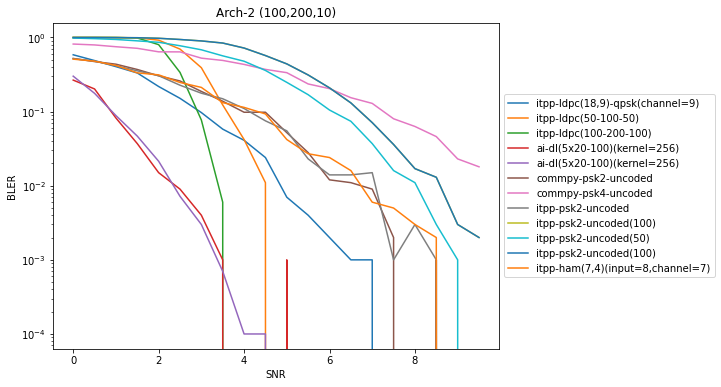

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
#ax2.plot(snrs,times_per_iter_pyldpc,'', label="pyldpc") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_tensor,'', label="tensor") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_awgn,'', label="commpy-awgn") # plot decode timing for different SNRs
ax1.set_xlabel('SNR')
#ax2.set_ylabel('Decoding Time [s]')
#ax2.annotate('Total Runtime: pyldpc:{:03.2f}s awgn:{:03.2f}s tensor:{:03.2f}s'.format(numpy.sum(times_per_iter_pyldpc), 
#            numpy.sum(times_per_iter_awgn), numpy.sum(times_per_iter_tensor)),
#            xy=(1, 0.35), xycoords='axes fraction',
#            xytext=(-20, 20), textcoords='offset pixels',
#            horizontalalignment='right',
#            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

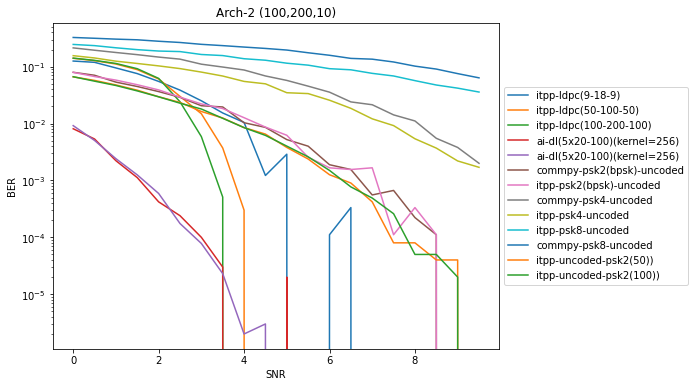

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-dl(5x20-100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()